In [33]:
import pandas as pd
import math
import numpy 
import matplotlib.pyplot as plt

In [34]:
df = pd.read_excel("cr.xls")
df.head()

,Fitch_grade,Fitch_observed_DR,Moodys_grade,Moodys_observed_DR,SnP_grade,SnP_observed_DR
0,AAA,0.0012,Aaa,0.0000,AAA,0.0000
1,AA+,0.0000,Aa1,0.0000,AA+,0.0000
2,AA,0.0000,Aa2,0.0000,AA,0.0002
3,AA-,0.0008,Aa3,0.0004,AA-,0.0003
4,A+,0.0000,A1,0.0006,A+,0.0005


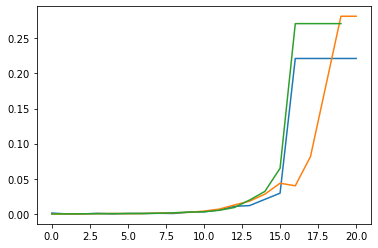

In [35]:
plt.plot(df.Fitch_observed_DR)
plt.plot(df.Moodys_observed_DR)
plt.plot(df.SnP_observed_DR)

In [37]:
def mono_smooth(y):
    y = y.dropna().to_numpy()
    x = numpy.arange(len(y))
    N = len(y)

    # Prepare bases (Imat) and penalty
    dd = 3
    E  = numpy.eye(N)
    D3 = numpy.diff(E, n = dd, axis=0)
    D1 = numpy.diff(E, n = 1, axis=0)
    la = 100
    kp = 10000000

    # Monotone smoothing
    ws = numpy.zeros(N - 1)

    for it in range(30):
        Ws      = numpy.diag(ws * kp)
        mon_cof = numpy.linalg.solve(E + la * D3.T @ D3 + D1.T @ Ws @ D1, y)
        ws_new  = (D1 @ mon_cof < 0.0) * 1
        dw      = numpy.sum(ws != ws_new)
        ws      = ws_new
        if(dw == 0): break  

    # Monotonic and non monotonic fits
    return mon_cof

<ipython-input-42-333765bc0fff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SnP_observed_DR'][:-1] = mono_smooth(df.SnP_observed_DR)


<Figure size 2000x1500 with 0 Axes>

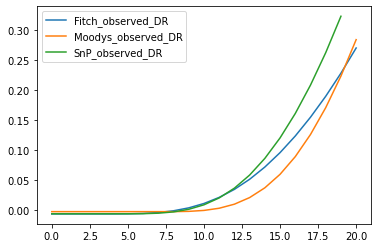

In [42]:
df['Fitch_observed_DR'] = mono_smooth(df.Fitch_observed_DR)
df['Moodys_observed_DR'] = mono_smooth(df.Moodys_observed_DR)
df['SnP_observed_DR'][:-1] = mono_smooth(df.SnP_observed_DR)
df.plot()